# Shayaan Mussani - Park.CSV
I will be using park data to find out where the best neighborhood in Pittsburgh for greenspace may reside.

In [81]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv("park.csv")
data.head()

,_id,objectid_1,objectid,acreage,sqft,final_cat,type,sector,origpkname,updatepknm,...,globalid,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,globalid_1,shape_area,shape_length
0,18778,1202,36.0,0.959034,41775.367101,Neighborhood Park,NP,15.0,Cliffside Parklet,August Wilson Park,...,764d9a2f-719c-49c2-b747-8f276149bf04,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Schenley,0.959034,f781af9c-9ec2-4b5e-b5c5-9cc21608635c,6709.199219,390.397012
1,18779,1203,198.0,2.060117,89738.347520,Neighborhood Park,NP,2.0,Young Field,Young Field Park,...,9b969f67-1f2e-4f4b-8556-e4ac49ca208e,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Riverview,2.060117,659c4c55-50fc-4883-8606-76f029fcca47,14423.417969,511.980181
2,18780,1204,158.0,0.468682,20415.724875,Neighborhood Park,NP,8.0,Revenue Park,Roland Lockridge Community Park,...,44bbbdf5-c2db-451c-b880-9251b8211455,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Frick,0.468682,04e61cab-bea6-47dd-964a-0723197726cf,3273.722656,236.488235
3,18781,1205,72.0,1.955430,85178.182207,Neighborhood Park,NP,12.0,Friendship Park,Friendship Park,...,f95cbafc-dcd8-493f-8b98-89745c6434ca,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Highland,1.955430,22563a68-61d3-46f3-9d5c-4558ee12be1f,13686.265625,760.982871
4,18782,1206,87.0,5.108070,222506.623799,Neighborhood Park,NP,12.0,Heths Playground,Heth's Park,...,a6a4ac92-5a00-4af5-9f11-716e51079fea,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02T14:10:28.845000+00:00,Parks - Highland,5.108070,b5b34833-e1d5-430f-afcc-40a1670d545d,35767.898438,875.156997


### Important First Steps
Of course to start out we have to import the CSV, pandas, numpy, and matplotlib. It does seem as if there is a lot of parks to sort thourgh and a lot of data points to look at. The divname column may be of use as it sorts the parks by each division they are in, though some parks are left out with no divisions most of the parks have been given a division.

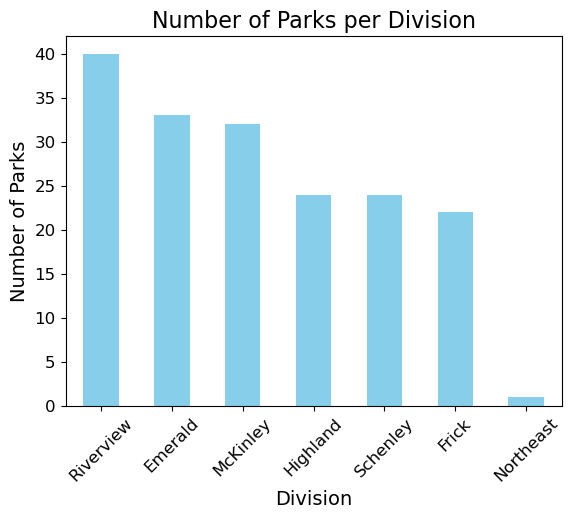

In [66]:
division_counts = data['divname'].value_counts().sort_index().sort_values(ascending=False)

division_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Parks per Division', fontsize=16)
plt.xlabel('Division', fontsize=14)
plt.ylabel('Number of Parks', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Initial findings
The graph shows can show us the number of parks in each division. It appears as though Riverview has the most parks by a decent amount. It also appears that there is an outlier: Northeast. So lets drop it to make the graph look a little nicer.

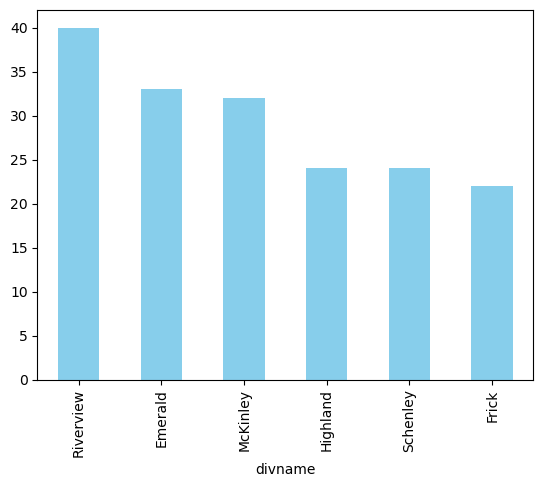

In [72]:
division_counts_filter = division_counts.drop('Northeast')
division_counts_filter.plot(kind='bar', color='skyblue')
plt.show()

That looks much better. It seems as though the Riverview division has the most parks, but the question is by how much. While the graph does give us a good idea how many parks each division has compared to eachother, it doesn't exactly tell us how many parks are in each division. So let's see the number of parks per division.

In [58]:
division_counts_filter.head()

divname
Riverview    40
Emerald      33
McKinley     32
Highland     24
Schenley     24
Name: count, dtype: int64

### More Data Needed
So now we know that the Riverview division has the most parks located in it, but there is a question that needs to be asked: "Does Riverview have a lot of really tiny parks and Frick have a few large parks?" To answer this question it is relatively simple. Simply create a graph of the divisions sorted by total square feet of park.

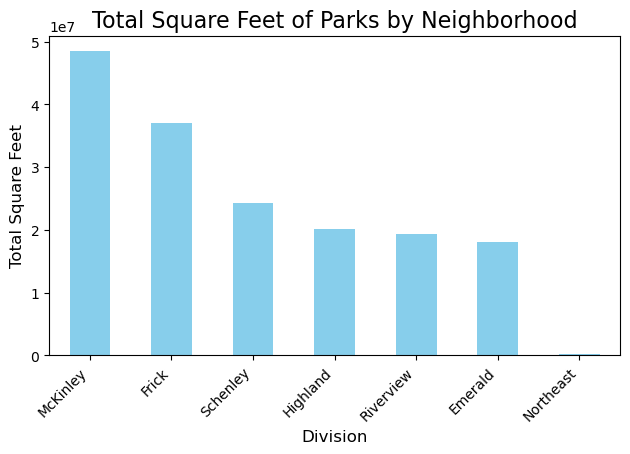

In [87]:
neighborhood_park_area = data.groupby('divname')['sqft'].sum()

neighborhood_park_area.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Square Feet of Parks by Neighborhood', fontsize=16)
plt.xlabel('Division', fontsize=12)
plt.ylabel('Total Square Feet', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Again it seems Northeast doesnt have much going for it, so lets drop it:

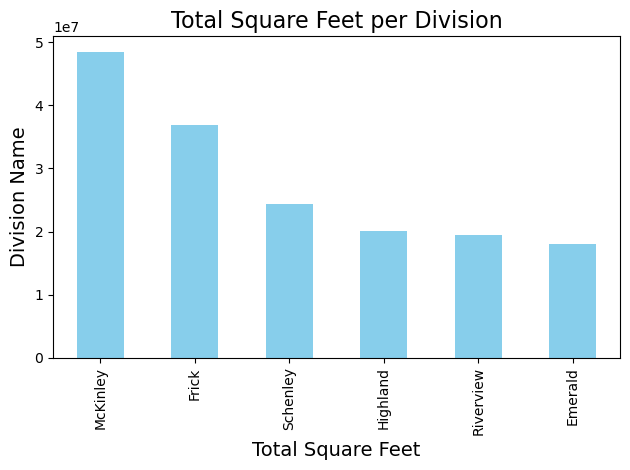

In [48]:
data_filtered = data[data['divname'] != 'Northeast']

new_park_area = data_filtered.groupby('divname')['sqft'].sum().sort_values(ascending=False)

new_park_area.plot(kind='bar', color='skyblue')
plt.title('Total Square Feet per Division', fontsize=16)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Division Name', fontsize=14)
plt.tight_layout()
plt.show()

It seems as though MicKinley has the most total square feet of park in its division. In second place came Frick, which had the least amount of total parks. So it is a good thing that we looked at total square feet of park, and not just amount of parks. Also it is notable to see that Riverview was also second to last in total square feet of park even though it had the most parks. Again the graph doesnt give us the exact number so lets see what those numbers are.

In [90]:
new_park_area.head()

divname
McKinley     4.853064e+07
Frick        3.697038e+07
Schenley     2.428691e+07
Highland     2.013166e+07
Riverview    1.938997e+07
Name: sqft, dtype: float64

### Conclusion and Final Thoughts
When you put all this data together it seems as though the McKinley division would have the best neighborhood for greenspace as it came #3 for most parks and #1 for total amount of park. Though there is one last question: "Where are the divisions of Pittsburgh?"

![map of park divisions](image.png "maps")

Small disclaimer, this map was made without the use of GeoPandas as my GeoPandas journey was unsuccessful. So this map was made by myself. As a non-native Pittsburgh, I didn't have much of an idea of where would have the most park, but now I know if I want to go to parks I should definitely go for a stroll in the McKinley division.